# **🐳 Docker Architecture**

Docker follows a Client–Server model. It consists of these main components:

  * Docker Client

  * Docker Host (includes Daemon, Images, Containers, Network, Storage)

  * Docker Registry

  * Networking modules

  * Storage modules

# **🔹 1. Docker Client**

* This is what you (the user) interact with.

* Example: when you run commands like:

      docker run, docker pull, docker build.

* The client talks to the Docker Daemon using API calls (REST API).

* The client can connect to multiple daemons at once.

👉 Think of the Docker Client as a remote control, and the Docker Daemon as the TV. You press a button, the TV does the action.

* Client ek CLI (command line tool) hota hai → docker run, docker ps, docker build, etc.

* Client khud kuch nahi karta, bas message bhejta hai Docker Daemon ko.

* Communication REST API ke through hota hai.

* Tum terminal/CMD me likhti ho:

      docker run hello-world

Yeh tumne Docker Client pe likha.

Mtlb Jab hm CMD ya terminal open krty hain aur likhty hain docker run ..., to haan, wo CMD tera Docker client hota hai.

Asaan zubaan me:

* Docker client wo cheez hai jahan tu commands likhti hai.

* Ye client Docker daemon (jo background me chalta hai) ko bolta hai ke “ye kaam kar do”.

* Matlab tu bolti hai: docker run nginx → client ye message daemon ko bhejta hai → daemon container chala deta hai.

To tu client se “order” deti hai, aur daemon wo “kaam” karta hai.

Agr hm random koi command likhen e.g. cd /myfolder. to yeh docker se related command ni eh to yeh CMD khud operate kry ga q k yh windows ka kaam eh jo CMD bhaag k kry ga q k actual me CMD ko bnaya to windows ne eh.

### **Other Docker Clients:**

"Docker client wo hota hai jo Docker daemon ko commands bhej sakta hai."

Examples:

        🧑‍💻 CMD / Terminal / PowerShell
          — sabse common client.
          — tu likhti hai docker run, docker ps, etc.

        🪟 Docker Desktop (GUI app)
        — ye ek graphical client hai.
        — tu click se containers start/stop karti hai, images dekh sakti hai.
        — andar se ye bhi daemon se baat karta hai.

        🌐 Docker API / SDKs
        — agar tu programming se Docker control karna chahe (Python, Go, etc.),
        to tu Docker API use karti hai.
        — ye bhi client hi hota hai, bas “code version” me.


# **🔹 2. Docker Host**

* The Docker Host is the actual machine (your laptop, VM, or server) where Docker runs. It contains:

  * Docker Daemon (```dockerd```) → the “brain” of Docker, in charge of all container operations (running, stopping, building, pulling). jese kisi b cheez k lie uska driver krna zroori hota eh jo operate krta eh phr us k lie. isi trha docker daemon is driver of docker. yeh Host ke andar chalta hai, request receive karta hai aur actual kaam karta hai. For example, you wrote "docker run myimage" on cmd. Yeh tumne Docker Client pe likha. Jaise tum phone se WhatsApp message bhejti ho → message server ke paas jata hai. Waisa hi, client apni request daemon ko bhejta hai.

  * Images → templates (blueprints) used to create containers.

  * Containers → the actual running applications, created from images.

  * Networks → for container-to-container or container-to-host communication.

  * Storage → for handling data inside and outside containers.

👉 Images → used to make Containers.

👉 Daemon → runs in the background, executes all instructions from Client.

Installation of Docker Daemon:

* Docker daemon akela install nahi hota —
* wo Docker Desktop ke andar hi aata hai (Windows & Mac pe).
* jab tu Docker Desktop install karti hai → uske andar daemon, client, aur sab kuch ready hota hai.

🔹 Analogy (Restaurant 🏨)

* Tum (User) → bolti ho "Mujhe pizza chahiye."

* Waiter (Client) → tumhari baat ko kitchen (Daemon) tak pohchata hai.

* Kitchen (Daemon inside Host) → asal me pizza banata hai (Container run hota hai).

👉 Tum directly kitchen me jaake order nahi karti. Client tumhara messenger hai.

**“Docker Desktop ek bundled application hai jo Docker daemon, Docker client aur ek GUI ko combine karke ek hi package me provide karta hai. Iske through hum Windows/Mac par containers easily build aur run kar sakte hain.”**

Windows me Docker Desktop actually ek Linux VM chalata hai, aur uske andar tumhare containers run hote hain. Matlab containers directly Windows host pe nahi bante, balki ek hidden Linux virtual machine pe bante hain.

## **🔹 3. Docker Images**

* Definition: A Docker Image is like a template/blueprint of an application, with all required libraries, runtime, and dependencies.

* Use: From one image, you can create multiple containers.

* Customization: You can modify existing images and create new ones.

* Metadata: Images also store information about what the container needs (e.g., ports, environment variables).

👉 Example: Python image → can spawn multiple Python app containers.

### **Customizing a docker image:**

* Iska matlab yeh hai ki agar tumhe koi ready-made image milti hai (jaise Python, Nginx, MySQL, Node.js, etc.) ya development team ki bnai hui image b, tum usko apni zaroorat ke hisaab se badal sakti ho aur ek nayi image bana sakti ho.

**Process:**

1. Base image ko pull kren, suppose k hm built in image of python 3.9 ko pull kr lety hain:

        docker pull python:3.9

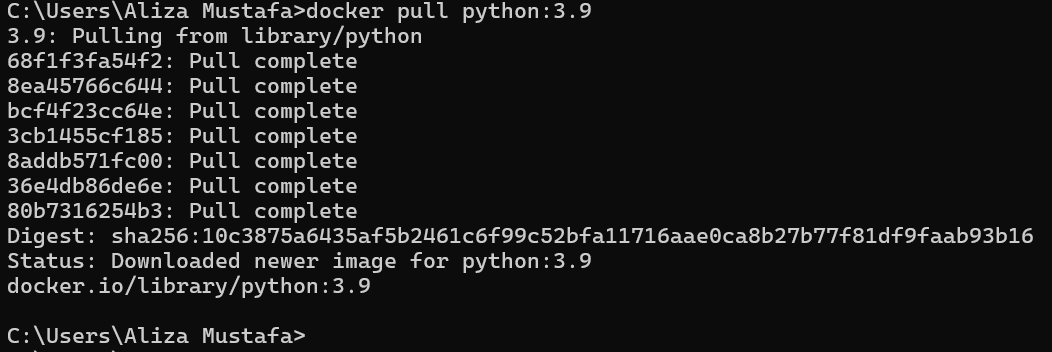


2. Container Run karo aur Changes karo

        docker run -it python:3.9 bash
-it = interactive mode (taake tu andar commands likh sake)

bash = ye bolega “mujhe andar ka terminal de do”

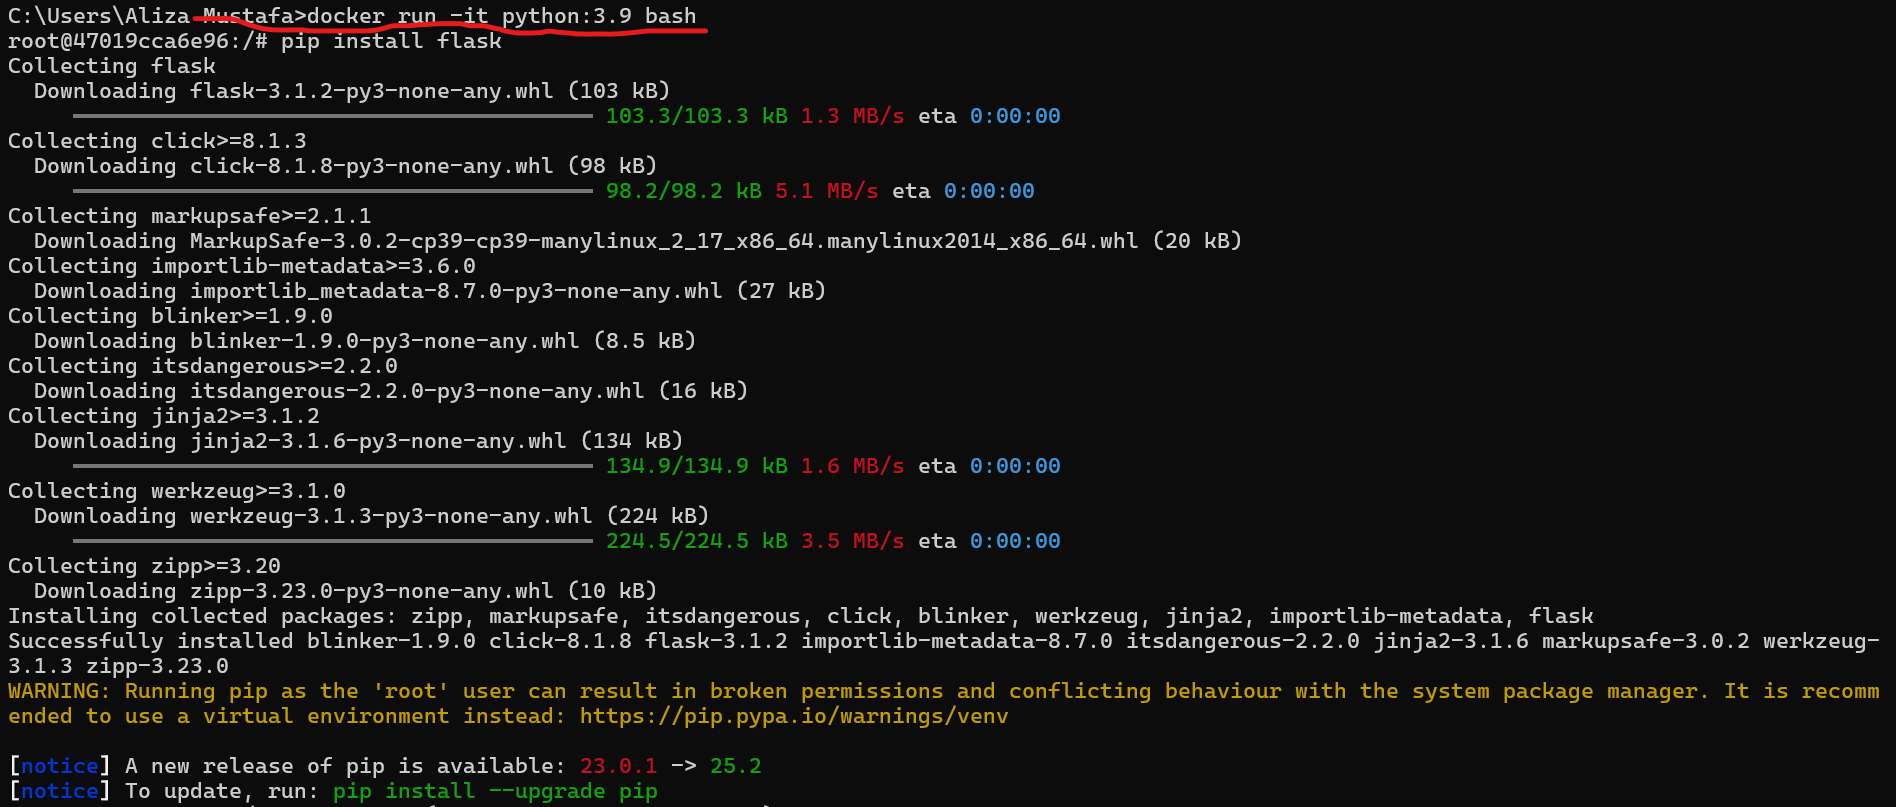
  



ab tu andar chali gayi us container ke.

matlab tu us image ke andar ka file system dekh sakti hai.

likh:

      ls


ye dikhayega andar kya files/folders hain.
(tu cd / se move kar sakti hai, jaise normal Linux terminal me karti hai.)

agar tu kisi specific file ka content dekhna chahti hai:

      cat filename.py


ya

      cat /path/to/somefile

ab tu apne local computer pe us file ko nikal sakti hai:


      docker run -it --name mypython python:3.9 bash
      
      docker cp mypython:/app/app.py C:\Users\Aliza\Desktop\

3. Is container ke andar jaake tum libraries install kar sakti ho, files add kar sakti ho, etc. chalo hm flask install krty hain is k andr or aik print ki line add krty hain:

        pip install flask
        echo "print('I have added flask in this image')" > app.py


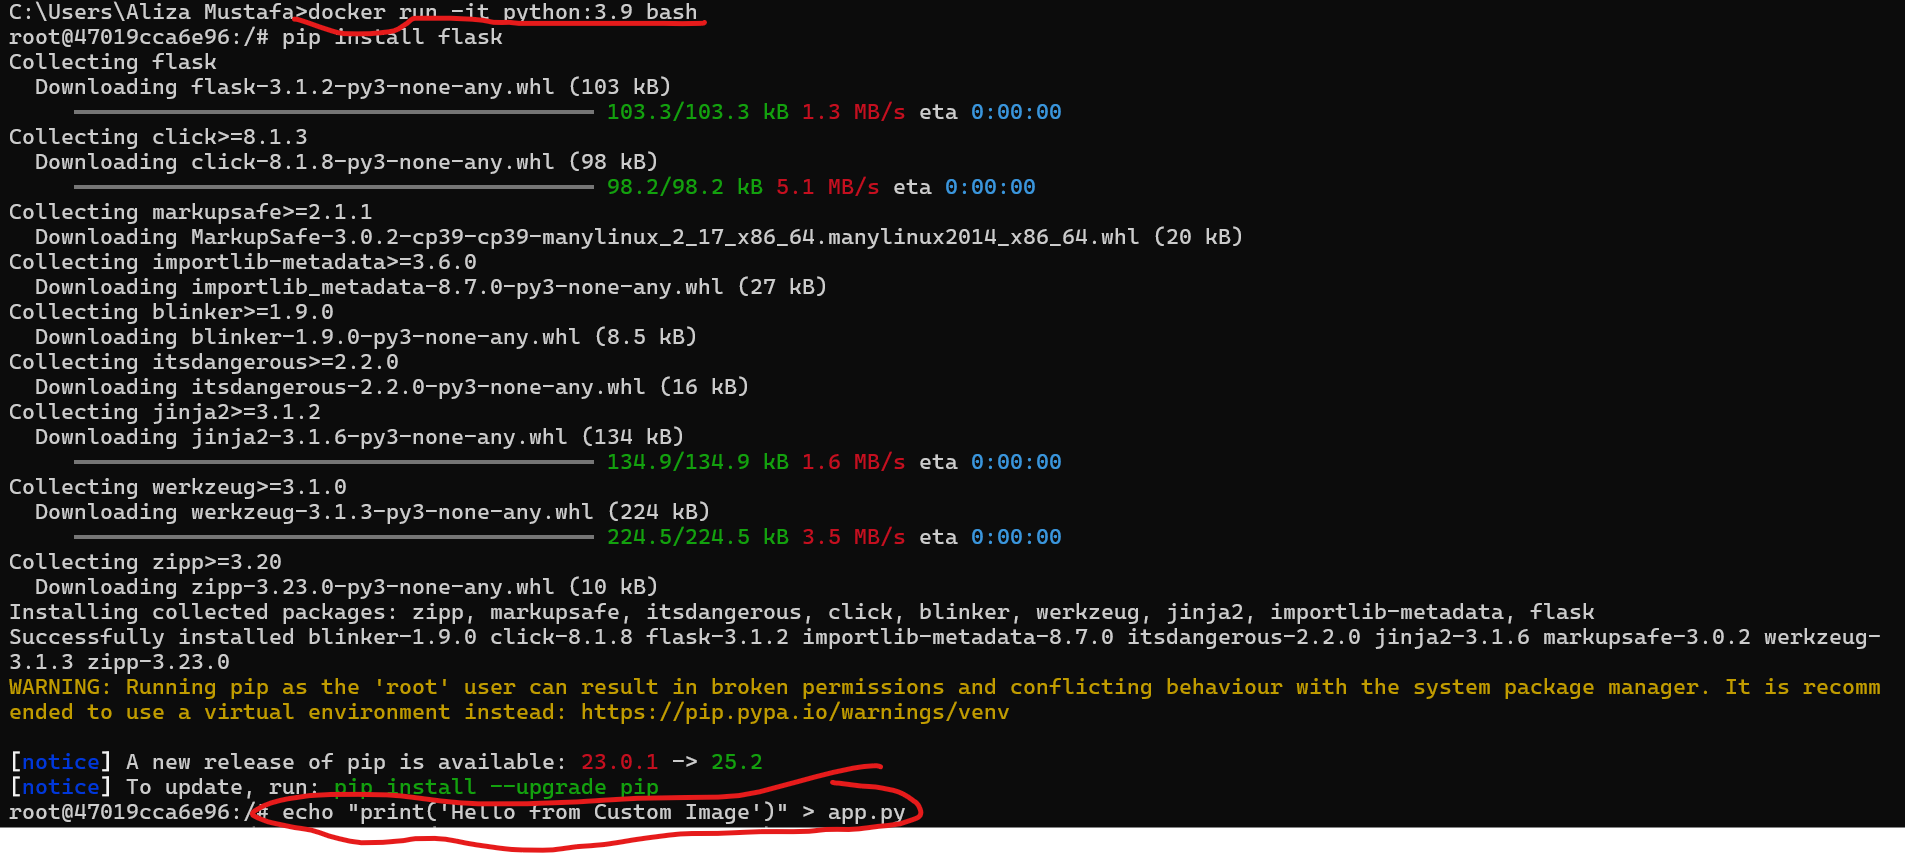


4. Now write exit to get out of this customization mode. ab is new image ko save krty hain.

        docker ps -a

suppose hamry pas "python:3.9" image ki id ai eh 12p0392434. ab hm is ko use kr k new image save (commit) kren gay.

      docker commit <container_id> my-python-flask:v1

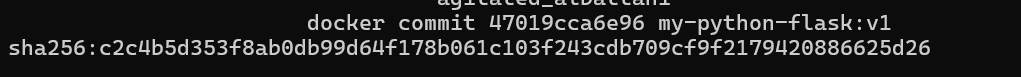

Ab hmari custom image ready hai → my-python-flask:v1

## **🔹 4. Docker Containers**

* Encapsulated environments → where your app actually runs.

* Each container is self-contained and only has access to resources defined in its image, unless you give extra permissions.

* You can also save the state of a container and turn it back into a new image.

👉 Example: Container = Running instance of an image (like a cake made from a recipe).

Extra permissions you can give in docker container:

1. **Port Mapping (-p)**

        docker run -p 5000:5001 myflaskapp


container ke andar flask app port 5000 pe chal raha hoga.

-p 5000:5001 ka matlab → host ka port 5001 bind ho jaye container ke port 5000 ke saath.
👉 Ab tum browser me http://localhost:5001 likh ke flask app access kar sakti ho.
(Default me container ka network andar hi rehta hai, bahar se access nahi hota.)


**2. Privileged Mode (--privileged)**

      docker run --privileged -it ubuntu bash


* ye container ko extra permissions deta hai, jese host ke devices (USB, GPU, etc.) tak pohonch.

* Usually sirf special cases (jaise GPU programming, Docker-in-Docker) ke liye use hota hai.
👉 Matlab container ko lagbhag host jaisi powers mil jaati hain.


### **🔹 -it Flag**

-it actually do flags ka combination hai:

> -i (interactive)

Matlab container ke stdin (input stream) open rahega.

Tum uske andar interact kar sakti ho (jaise pip install flask likhna).

> -t (tty)

Matlab tumhe ek pseudo-terminal milega (jese tum normal command prompt/PowerShell use karti ho).

Without -t, text plain stream jesa lagta hai, formatting thodi ajeeb hoti hai.

👉 Together -it ka matlab hai: container ke andar ek interactive shell chalana jisme tum commands likh sako.

Example:

      docker run -it ubuntu bash

ubuntu image ke base pe container start hoga

tumhe uska bash terminal mil jayega, jisme tum commands likhogi (like you did pip install flask).

## **🔹 5. Docker Registry**

* A repository where Docker images are stored and shared.

* Two types:

  * Public registry (e.g., Docker Hub, Docker Cloud) → used by communities, anyone can pull.

  * Private registry → used within organizations/teams to share images securely For example, "Docker Hub Private Repos". Docker Hub free public repos deta hai, but tum paid plan le lo to private repos bana sakti ho. Other examples of private registries are: AWS Elastic Container Registry (ECR), Azure Container Registry (ACR), Google Artifact Registry (GCP), Self-hosted Docker Registry.

Matlab image push karo → sirf tum aur jinhe tum access do wo pull karenge.

Example:


* Default registry = Docker Hub.

Commands:

    docker push → push an image to registry.

    docker pull → pull an image from registry.

    docker run → run a container from an image.

👉 Analogy:

Registry = App Store,

Images = Apps,

Containers = Installed apps running on your phone.

## **🔹 6. Docker Networking**

* For containers to communicate with each other or the outside world. There are five main network drivers:

    * Bridge → Default driver. Containers talk to each other on the same host.

    * Host → Removes network isolation; container shares host’s network.

    * Overlay → Used for multi-host networking, e.g., in Docker Swarm/Kubernetes clusters.

    * None → Networking disabled. Container is isolated.

    * Macvlan → Assigns containers their own MAC address, making them look like physical devices on the network.

## **🔹 7. Docker Storage**

💬 **Line 1:**

    “We can store data in a container’s writable layer, but we will need a storage driver.”

Meaning:

* har container ke paas apni ek chhoti jagah (layer) hoti hai jahan wo likh sakta hai — jaise temporary storage.

* ye data sirf jab tak container zinda hai tab tak rehta hai.

* agar tu container delete kar de, data bhi gaya ❌

* aur ye “layer” chalti hai storage driver ke zariye (jo system decide karta hai data disk pe kaise save hoga).

💬 Line 2:

    “There are four techniques available for persistent data: data volumes,
    
    volume container, directory mounts, and storage plugins.”

samajh:
jab tu chahe ke data container delete hone ke baad bhi safe rahe,

to tu “persistent storage” use karti hai.

iska matlab: data container ke bahar host pe ya kisi external place me save hota hai.

iske 4 tareeqe hain 👇



## **💾 1. Data Volumes**

“Data volumes are stored on the host file system using a copy-on-write process…”

simple words me:

* Docker khud ek folder banata hai host (tera computer) pe.

* aur us folder ko container ke andar mount kar deta hai.

* jab tu andar file likhti hai, wo asal me host pe save hoti hai — isliye container delete hone ke baad bhi safe rehti hai.

* ye sab automatically handle hota hai, tu path specify nahi karti.

📍Example:

      docker run -v myvolume:/data nginx

👉 Docker khud ek hidden folder banata hai host pe

👉 us folder ko container ke /data ke sath mount (connect) kar deta hai

👉 ab agar tu container ke andar /data me koi file likhegi
wo actually host pe save ho jayegi (safe rahegi even container delete ho jaye)


## **📦 2. Volume Container**

   “Hosting a volume in a dedicated container and mounting that volume to other containers is called a volume container.”

simple samajh:

* tu ek special container banati hai sirf data rakhne ke liye.

* baaki containers us se “share” kar lete hain.

* ye useful hota tha purane Docker versions me; ab kam use hota hai.

Example:

        docker create -v /data --name data_container busybox  
        
        #Above: docker for keeping data
        
        docker run --volumes-from data_container nginx   
        
        #Above: here name of data_container mentioned to keep data

## **📁 3. Directory Mounts (Bind Mounts)**

“Mount the local directory of a host into a container.”

samajh:

* tu apne system ka koi folder directly container me link kar deti hai.

* matlab agar tu apne desktop pe koi file badalti hai,
to wo container ke andar bhi update hoti hai — real-time!

      docker run -v C:\Users\Aliza\myapp:/app python:3.9


## **🌐 4. Storage Plugins**

    ]“These plugins allow you to link to external storage systems…”

samajh:

* ye advanced feature hai —
* jab tu apna data network drives, cloud storage (AWS, Azure), ya NAS pe rakhna chahe.

* plugin Docker ko connect kar deta hai external storage se.

📍Example:

soch le jaise tu bolti hai “mera data AWS EBS volume pe store karo” —
ye Docker plugin se possible hai.

| Technique        | Data kaha store hota hai           | Container delete hone ke baad? |
| ---------------- | ---------------------------------- | ------------------------------ |
| Writable Layer   | Container ke andar                 | ❌ Lost                         |
| Data Volume      | Host pe (Docker managed)           | ✅ Safe                         |
| Volume Container | Ek aur container ke andar (shared) | ✅ Safe                         |
| Directory Mount  | Tere system ke folder me           | ✅ Safe                         |
| Storage Plugin   | External storage/cloud             | ✅ Safe                         |




📌 Summary (Interview-Ready):

Docker Client → sends commands (via CLI/API).

Docker Daemon (dockerd) → executes commands, manages containers, images, networking, storage.

Docker Images → Blueprints/templates for containers.

Docker Containers → Running instances of images, isolated environments.

Docker Registry → Stores and shares images (Docker Hub = default).

Docker Networking → Lets containers talk (Bridge, Host, Overlay, None, Macvlan).

Docker Storage → Ensures data persistence (Volumes, Bind Mounts, Plugins).

⚡ In short:
Client → Daemon → Host (images + containers + network + storage) → Registry (public/private).

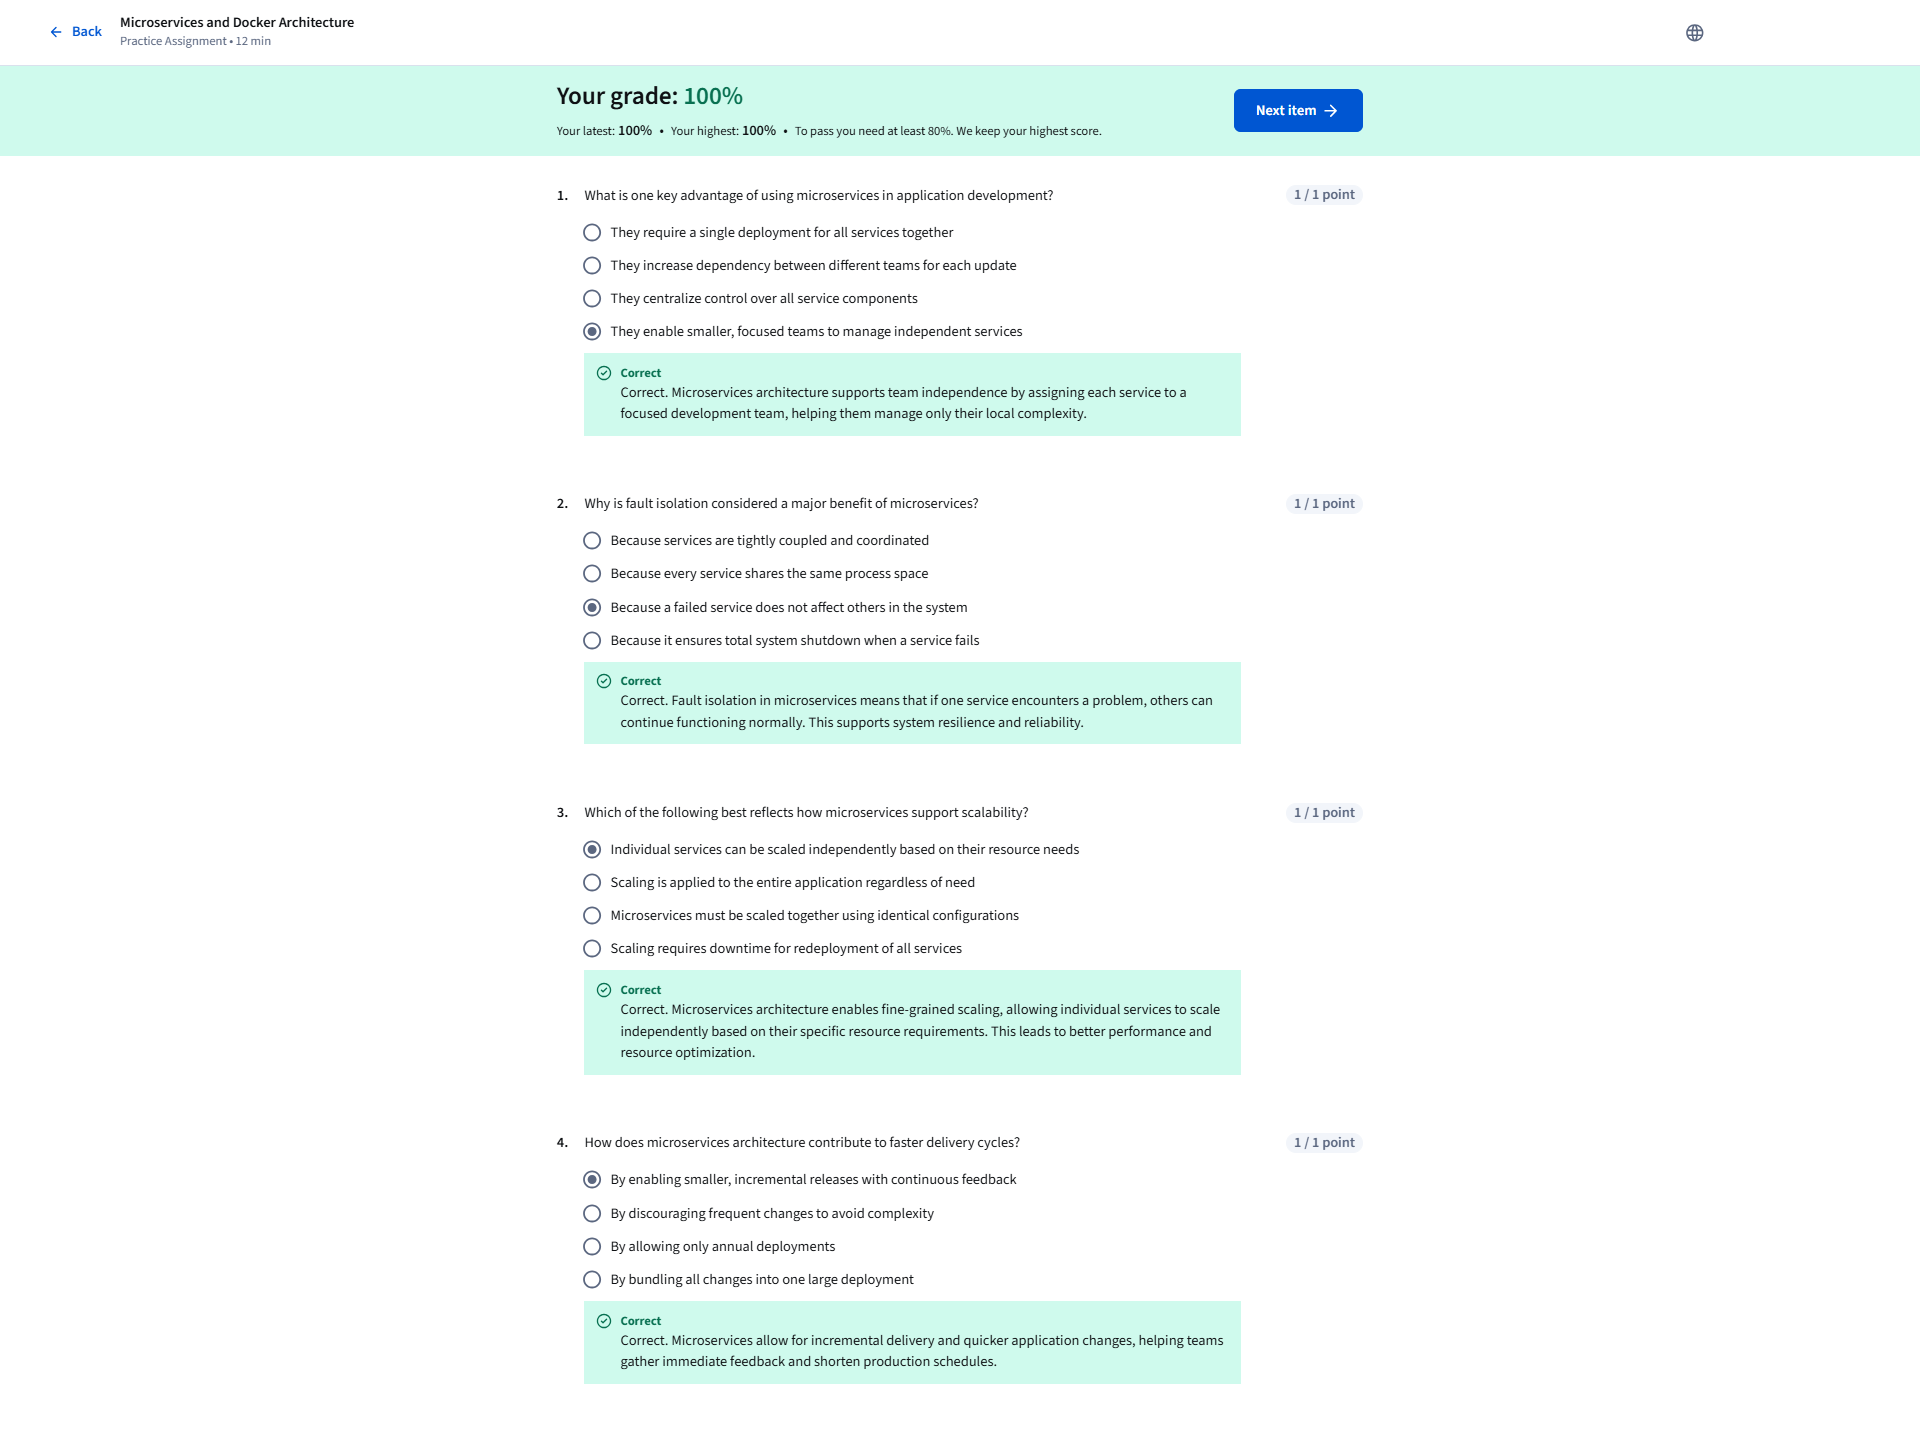